## Ejercicio:

En el aula tenemos 15 sitios nada más. Cada persona tiene asignado un sitio. La primera en llegar es siempre Isabel, y el último en llegar es siempre Ramón. Cuando Isabel llega, se sienta donde le parece mejor, que puede ser su sitio o no. Cada nueva persona que llega intenta sentarse en su sitio correspondiente; pero si resulta que alguien lo ha ocupado, entonces se sienta en cualquier asiento libre que haya. Cuál es la probabilidad de que Ramón se siente en su sitio? Y si tenemos un aula con 100 personas y sitios, cambia la probabilidad?

Cada vez que se llena el aula es una tirada. La probabilidad puntual hay que estimarla usando 100 tiradas. Estas 100 tiradas configuran un experimento, y darán una probabilidad estimada dividiendo el número de veces que Ramón se ha sentado en su sitio, dividido por 100. 

Para comprobar si la probabilidad es estable o no, repetiremos el experimento 200 veces. Después obtendremos una estimación de la función de densidad de la probabilidad.


In [1]:
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

En primer lugar, definimos el número de personas que intervendrán en el experimento:

In [2]:
numero_personas = 15

Creamos dos listas:

* Una lista `personas` con las personas que intervendrán
* Una lista `sitios` con los sitios que tengan asignadas estas personas

In [3]:
# Lista de personas
personas = []
for x in range(numero_personas):
    personas.append("Alumno " + str(x))

# Lista de sitios    
sitios = list(range(0,len(personas)))

print(personas)
print(sitios)

['Alumno 0', 'Alumno 1', 'Alumno 2', 'Alumno 3', 'Alumno 4', 'Alumno 5', 'Alumno 6', 'Alumno 7', 'Alumno 8', 'Alumno 9', 'Alumno 10', 'Alumno 11', 'Alumno 12', 'Alumno 13', 'Alumno 14']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


Definimos una función que reproduzca la situación en la que van llegando alumnos y se van sentando de acuerdo con el enunciado.

In [4]:
def asignar_sitios_print (personas,sitios):
    
    d1 = dict((key, value) for (key, value) in zip(personas, sitios))  # Diccionario con los sitios "que deberían ser"
    sitio_0 = random.choice(sitios)
    
    print('La asignación "teórica" de sitios es:')
    print(d1)
    print("")
    print("'Alumno 0' elige el sitio %d, que corresponde a '%s'." % (sitio_0, personas[sitio_0]))

    
    if (sitio_0 == 0):
        resultado = 'El último se sienta en su sitio'
        print("")
        print("'a' se sienta en su sitio, y todos los demás también ")
    
    else:
        
        d2 = {}  # Diccionario vacío que iremos rellenando
        sitios_aux = list(sitios)  # Tengo que meter esto porque con el remove me cargo "sitios"
        sitios_aux.remove(sitio_0)
        personas_aux = list(personas)
        personas_aux.remove('Alumno 0')
        
        print(" ")
        print("Los sitios que quedan libres son:")
        print(sitios_aux)
        
        for persona in personas_aux:  # Creo un diccionario que me diga dónde se va sentando cada uno
            
            if d1[persona] in sitios_aux:  # Si la persona tiene su sitio libre, se sienta en él
                
                d2[persona] = d1[persona]
                sitios_aux.remove(d2[persona])
                                
            else:  # Si no, ocupa un sitio al azar
                
                sitio = random.choice(sitios_aux)
                d2[persona] = sitio
                sitios_aux.remove(sitio)    
        
        print(" ")
        print("Los sitios se asignan de la siguiente manera:")
        print (d2)
                           
        if (d2[list(d2.keys())[-1]]) == sitios[-1]:  
            resultado = 'El último se sienta en su sitio'
        else:
            resultado = 'El último NO se sienta en su sitio'

    return resultado

Realizamos una ejecución de la función e imprimimos los resultados.

In [5]:
asignar_sitios_print(personas,sitios)

La asignación "teórica" de sitios es:
{'Alumno 0': 0, 'Alumno 1': 1, 'Alumno 2': 2, 'Alumno 3': 3, 'Alumno 4': 4, 'Alumno 5': 5, 'Alumno 6': 6, 'Alumno 7': 7, 'Alumno 8': 8, 'Alumno 9': 9, 'Alumno 10': 10, 'Alumno 11': 11, 'Alumno 12': 12, 'Alumno 13': 13, 'Alumno 14': 14}

'Alumno 0' elige el sitio 3, que corresponde a 'Alumno 3'.
 
Los sitios que quedan libres son:
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
 
Los sitios se asignan de la siguiente manera:
{'Alumno 1': 1, 'Alumno 2': 2, 'Alumno 3': 14, 'Alumno 4': 4, 'Alumno 5': 5, 'Alumno 6': 6, 'Alumno 7': 7, 'Alumno 8': 8, 'Alumno 9': 9, 'Alumno 10': 10, 'Alumno 11': 11, 'Alumno 12': 12, 'Alumno 13': 13, 'Alumno 14': 0}


'El último NO se sienta en su sitio'

Ahora definimos la misma función pero quitando los `print`:

In [6]:
def asignar_sitios (personas,sitios):
    
    d1 = dict((key, value) for (key, value) in zip(personas, sitios))  # Diccionario con los sitios "que deberían ser"
    sitio_0 = random.choice(sitios)
    
    if (sitio_0 == 0):
        resultado = 'El último se sienta en su sitio'
    
    else:
        
        d2 = {}  # Diccionario vacío que iremos rellenando
        sitios_aux = list(sitios)  # Tengo que meter esto porque con el remove me cargo "sitios"
        sitios_aux.remove(sitio_0)
        personas_aux = list(personas)
        personas_aux.remove('Alumno 0')
                
        for persona in personas_aux:  # Creo un diccionario que me diga dónde se va sentando cada uno
            
            if d1[persona] in sitios_aux:  # Si la persona tiene su sitio libre, se sienta en él
                
                d2[persona] = d1[persona]
                sitios_aux.remove(d2[persona])
                                
            else:  # Si no, ocupa un sitio al azar
                
                sitio = random.choice(sitios_aux)
                d2[persona] = sitio
                sitios_aux.remove(sitio)    
                                   
        if (d2[list(d2.keys())[-1]]) == sitios[-1]:  
            resultado = 'El último se sienta en su sitio'
        else:
            resultado = 'El último NO se sienta en su sitio'

    return resultado

Definimos la función `experimento` que repite N veces el ejercicio:

In [7]:
def experimento(N, personas, sitios):
    ultimo_se_sienta = 0
    for k in range(N):
        r = asignar_sitios(personas,sitios)
        if (r == 'El último se sienta en su sitio'):
            ultimo_se_sienta += 1
    return ultimo_se_sienta/N

In [8]:
experimento(100,personas,sitios)

0.51

La ejecución de un experimento nos devuelve la cantidad de veces que el último se ha sentado en su sitio en las N ejeciciones.

Si replicamos el ejercicio M veces, obtendremos una estimación de la probabilidad.

In [9]:
experimentos_replica = [experimento(100, personas, sitios) for k in range(200)]

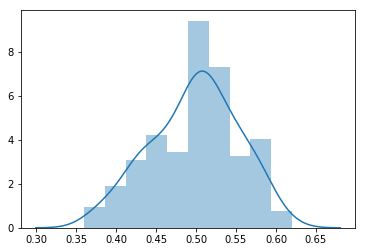

In [10]:
sns.distplot(experimentos_replica)

Observamos que la probabilidad de que el último se siente en su sitio sigue una distribución aproximadamente normal centrada en 0.50.

¿Cómo podemos **afirmar** que la probabilidad realmente **es** igual a 0.5?

Por cada experimento obtenemos un valor de la probabilidad. Si calculamos la media de la probabilidad a medida que vamos ejecutando experimentos, ¿a qué valor tenderá?

Según la ley de los grandes números (https://en.wikipedia.org/wiki/Law_of_large_numbers), al repetir un experimento muchas veces, la media muestral de un parámetro se acerca al valor esperado en la población de ese parámetro.

Por tanto, representaremos la media muestral a medida que vamos realizando repeticiones.

In [11]:
%%time

# Metemos en la lista "resultados" los valores de 1000 experimentos.

resultados = []
for x in range(1000):
    resultados.append(experimento(1000, personas, sitios))

Wall time: 9.99 s


In [12]:
# Convertimos la lista "resultados" a un array de numpy para poder calcular la media:

resultados_array = np.asarray(resultados)
type(resultados_array)
resultados_array[:5]

array([ 0.499,  0.51 ,  0.48 ,  0.478,  0.502])

In [13]:
# Calculamos para cada elemento "i" de la lista la media de los "i-1" anteriores.

medias = []
for x in range(1,1000):
    medias.append(resultados_array[:x].mean())

In [14]:
medias[:5]

[0.499,
 0.50449999999999995,
 0.49633333333333329,
 0.49174999999999996,
 0.49379999999999996]

In [15]:
# Creamos una lista que representa la media poblacional

media_poblacional = []
for x in range(1,1000):
    media_poblacional.append(0.5)

Representamos la media muestral frente al número de repeticiones:

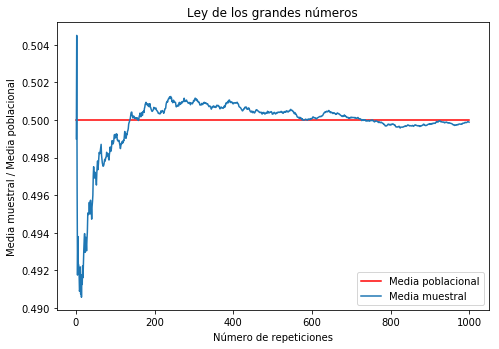

In [16]:
a = np.arange(1,1000)

fig = plt.figure()

axes = fig.add_axes([1,1,1,1])

axes.plot(a, media_poblacional, 'r', label = "Media poblacional")
axes.plot(a, medias, label = "Media muestral")

axes.set_xlabel('Número de repeticiones')
axes.set_ylabel('Media muestral / Media poblacional')
axes.set_title('Ley de los grandes números')

axes.legend(loc = 4)


Podemos observar que la media muestral va tendiendo a la media poblacional.

Utilizando el Teorema del Límite Central, podemos calcular un intervalo de confianza para la media muestral.

Este intervalo debería ir reduciéndose a medida que aumenta el número de repeticiones

In [17]:
# En "medias" tenemos los valores de la media muestral a medida que vamos repitiendo experimentos
# Vamos a calcular el vector "varianzas" con la misma idea

varianzas = []
for x in range(1,1000):
    varianzas.append((resultados_array[:x].var())/x) 
    
varianzas[:5]

[0.0,
 1.5125000000000027e-05,
 5.118518518518528e-05,
 4.4546875000000078e-05,
 3.1872000000000057e-05]

In [18]:
frontera_superior = []
frontera_inferior = []

for x in range(999):
    frontera_inferior.append(norm.ppf(0.1,medias[x],varianzas[x]))
    frontera_superior.append(norm.ppf(0.9,medias[x],varianzas[x]))

C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1907: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
C:\Users\migue\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1908: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


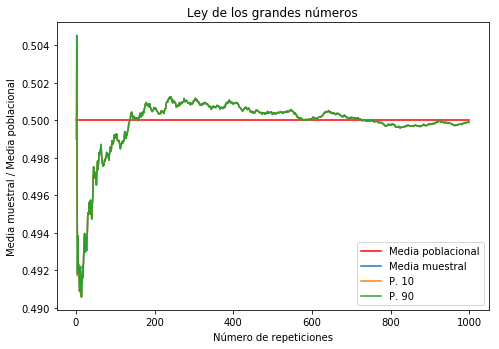

In [19]:
a = np.arange(1,1000)

fig = plt.figure()

axes = fig.add_axes([1,1,1,1])

axes.plot(a, media_poblacional, 'r', label = "Media poblacional")
axes.plot(a, medias, label = "Media muestral")
axes.plot(a,frontera_inferior, label = "P. 10")
axes.plot(a,frontera_superior, label = "P. 90")

axes.set_xlabel('Número de repeticiones')
axes.set_ylabel('Media muestral / Media poblacional')
axes.set_title('Ley de los grandes números')

axes.legend(loc = 4)


Debido a la escala, no se aprecia cómo se va estrechando el intervalo. Sin embargo, si definimos la diferencia como el valor de la frontera superior menos el valor de la inferior, podemos observar que ésta va disminuyendo.

Text(0.5,1,'Evolución de la distancia entre las bandas')

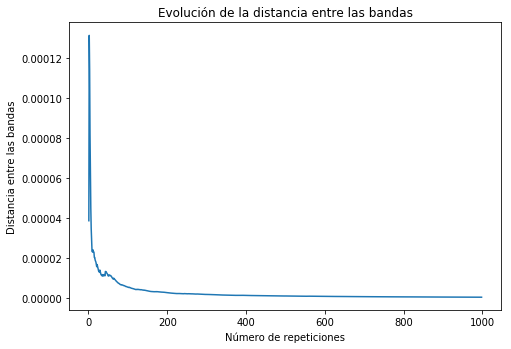

In [21]:
diferencia = np.asarray(frontera_superior) - np.asarray(frontera_inferior)

fig2 = plt.figure()

axes2 = fig2.add_axes([1,1,1,1])

axes2.plot(diferencia)

axes2.set_xlabel('Número de repeticiones')
axes2.set_ylabel('Distancia entre las bandas')
axes2.set_title('Evolución de la distancia entre las bandas')

